In [1]:
%pylab inline
import numpy as np
from distribution import *
from proposal import *
from sampler import Sampler

Populating the interactive namespace from numpy and matplotlib


### Example of sampling from a multivariate gaussian

In [2]:
dim = 2
nwalkers = 100
niters = 1000

In [3]:
mu = np.random.randn(dim)

cov = 0.5 - np.random.rand(dim ** 2).reshape((dim, dim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)

t_dist = MultivariateGaussian(cov=cov, mu=mu, dim=dim)
proposal = PCNWalkMove(s=2, beta=0.15)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

In [4]:
import time
start = time.time()
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
end = time.time()

proposal/walk.py:57: RuntimeWarning: covariance is not positive-semidefinite.
  + beta * rand.multivariate_normal(np.zeros_like(walkers_to_move[i]), cov)


In [5]:
print end - start

34.0254559517


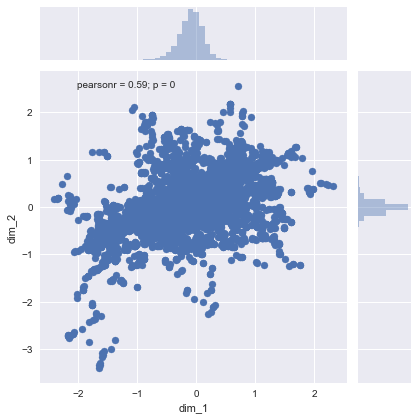

In [6]:
hist.plot_scatter(dim=[[0, 1]])

In [7]:
history = hist.get("chain")[0]
N = len(history)
start_from = 0

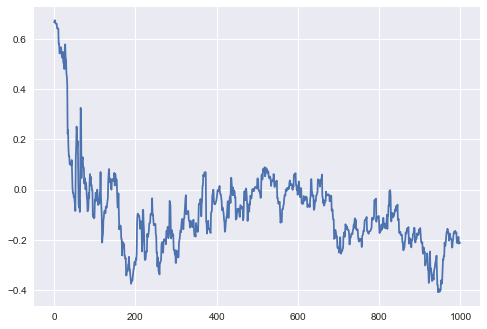

In [8]:
plt.plot(np.arange(N - start_from), history[start_from:, 0])

In [9]:
hist.acceptance_rate

0.95496999999999999

### Example of sampling from Rosenbrock density  
$f(x_1, x_2) \propto \exp(-[a(x_2 - x_1^2)^2 + (1-x_1)^2]\ / \ b)$  

In [2]:
dim = 2
nwalkers = 100
niters = 1000
t_dist = Rosenbrock()

Not using ensemble, use isotropic gaussian proposal with scale=0.2

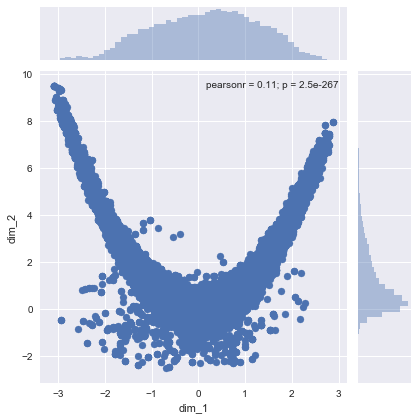

In [5]:
proposal = PCNWalkMove(s=None, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), store=True)
hist.plot_scatter(dim=[[0, 1]])

In [6]:
hist.acceptance_rate

0.62734000000000001

Use ensemble of size 3, scale=0.2. Ensemble seems to be making the acceptance prob extremely high.

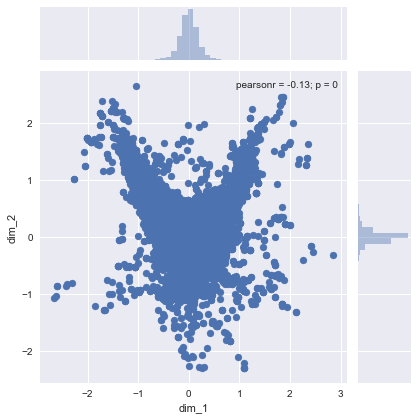

In [9]:
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), store=True)
hist.plot_scatter(dim=[[0, 1]])

In [10]:
hist.acceptance_rate

0.98079000000000005

Ensemble with pCN, beta=0.2

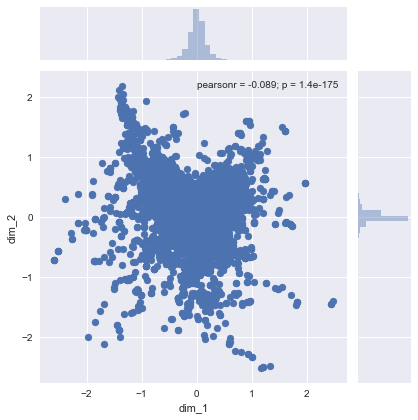

In [14]:
proposal = PCNWalkMove(s=3, beta=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), store=True)
hist.plot_scatter(dim=[[0, 1]])

In [15]:
hist.acceptance_rate

0.98628000000000005

### Example of sampling from an invariant distribution of SPDE  
Ref. Goodman & Weare, Ensemble Samplers With Affine Invariance  
A problem with this example is that it's harder to visualize, but from the experiments it does seem that pCN has more consistent performance in high dimensions (judging from acceptance probability).

In [2]:
dim = 50
nwalkers = 100
niters = 1000
t_dist = SPDE(N=dim)

Not using ensemble, use isotropic gaussian proposal with scale=0.2

In [3]:
proposal = PCNWalkMove(s=None, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]))
hist.acceptance_rate

0.049889999999999997

Use ensemble of size 3, scale=0.2.

In [4]:
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), store=True)
print "acceptance_rate", hist.acceptance_rate

proposal/walk.py:67: RuntimeWarning: covariance is not positive-semidefinite.
  new_pos[i] = rand.multivariate_normal(walkers_to_move[i], scale**2 * cov)


acceptance_rate 0.4505


In [ ]:
dim = 100
proposal = PCNWalkMove(s=3, scale=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), verbose=True, print_every=1000)

In [7]:
print "acceptance_rate", hist.acceptance_rate

acceptance_rate 0.34129


Ensemble with pCN, beta=0.2

In [5]:
proposal = PCNWalkMove(s=3, beta=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), store=True)
print "acceptance_rate", hist.acceptance_rate

proposal/walk.py:65: RuntimeWarning: covariance is not positive-semidefinite.
  + beta * rand.multivariate_normal(np.zeros_like(walkers_to_move[i]), cov)


acceptance_rate 0.90764


In [ ]:
dim = 100
proposal = PCNWalkMove(s=3, beta=0.2)
sampler = Sampler(dim=dim, t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)
hist = sampler.run_mcmc(niters, p0=np.random.randn(dim*nwalkers).reshape([nwalkers, dim]), verbose=True, print_every=1000)

In [12]:
print "acceptance_rate", hist.acceptance_rate

acceptance_rate 0.88883
